In [1]:
import numpy as np
import matplotlib.pyplot as plt

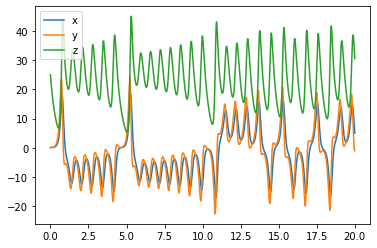

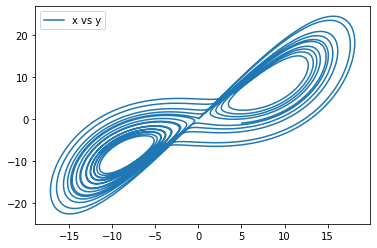

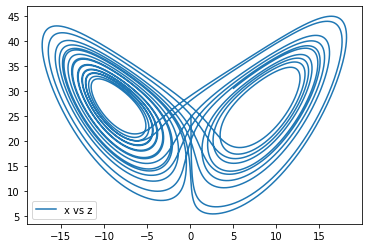

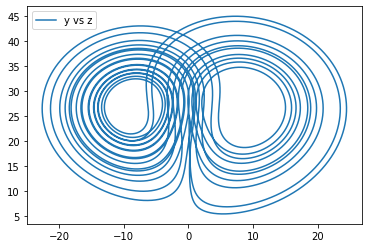

In [2]:
def f(x,y,z):
  return a*(y-x)

def g(x,y,z):
  return x*(b-z)-y

def j(x,y,z):
  return x*y-c*z

a = 10
b = 28
c = 8/3

tf=20
N=10**5
h=tf/N

x=np.zeros(N)
y=np.zeros(N)
z=np.zeros(N)
t=np.linspace(0,tf,N)

x[0]=.1
y[0]=.1
z[0]=25

for n in range(N-1):
  x[n+1]=x[n]+h*f(x[n],y[n],z[n])
  y[n+1]=y[n]+h*g(x[n],y[n],z[n])
  z[n+1]=z[n]+h*j(x[n],y[n],z[n])

plt.plot(t,x,label="x")
plt.plot(t,y,label="y")
plt.plot(t,z,label="z")
plt.legend()
plt.show()

plt.plot(x,y,label="x vs y")
plt.legend()
plt.show()

plt.plot(x,z,label="x vs z")
plt.legend()
plt.show()

plt.plot(y,z,label="y vs z")
plt.legend()
plt.show()